In [1]:
import tensorflow as tf
from tensorflow.keras. models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow. keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras. datasets .mnist
(x_train, y_train) , (x_test, y_test ) = mnist. load_data() # Data l oading
x_train, x_test = x_train/255.0 , x_test/255.0 #Normal izing the data

11490434/11490434 [==============================] - 0s 0us/step


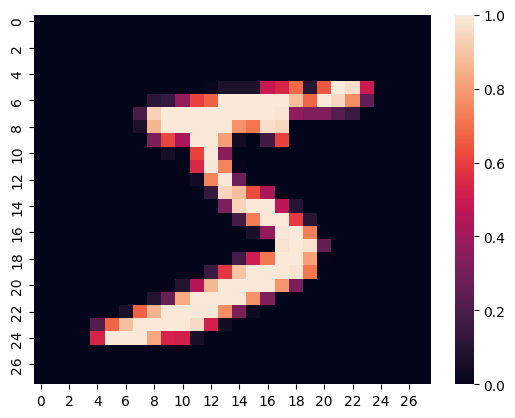

In [3]:
sns.heatmap(x_train[0])
plt.show()

In [4]:
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation="relu"),
Dropout (0,2),
Dense(10) ])

In [5]:
predictions = model(x_train[ :1]).numpy()
predictions

array([[-0.8789976 , -0.28303754, -0.29870784,  0.6554372 ,  0.5912709 ,
        -0.06317238,  0.21748686, -0.2102444 ,  0.33528176, -0.27671707]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.03847479, 0.06982299, 0.06873737, 0.17847311, 0.16738084,
        0.08699307, 0.11517902, 0.07509518, 0.12957793, 0.0702657 ]],
      dtype=float32)

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
model.compile (optimizer="adam",loss = loss_fn, metrics=["accuracy"])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2625 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1130 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0770 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0572 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0450 - accuracy: 0.9863


In [ ]:
model. evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0805 - accuracy: 0.9764 - 830ms/epoch - 3ms/step


[0.08052980154752731, 0.9764000177383423]

In [ ]:
val = model.fit (x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0766 - val_accuracy: 0.9769
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0733 - val_accuracy: 0.9793
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0867 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0796 - val_accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0752 - val_accuracy: 0.9800


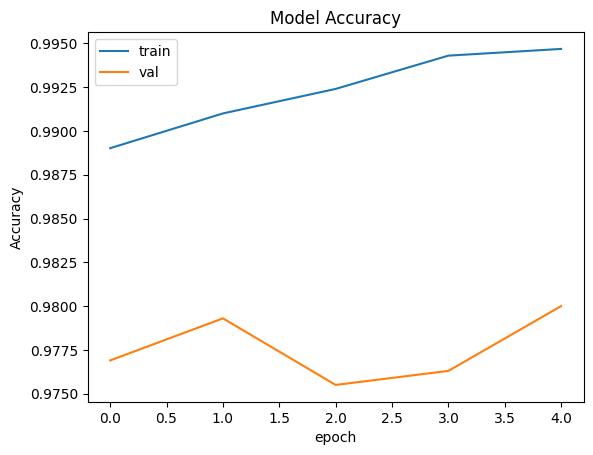

In [ ]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot (val.history[ "val_accuracy"])
plt.legend(["train","val"])
plt.show()